## Лабораторная работа 9. Минимизация функций

`Хачатрян Армен БПМ153`

`Вариант 28`

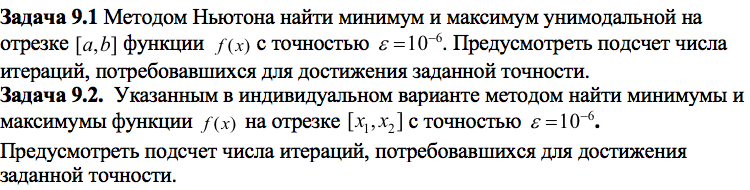

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sympy import *
import scipy
from scipy import optimize

# Теория

- Пусть $f$ - функция, определенная на отрезке $[a,b]$. Предположим, что на этом отрезке содержится единственная точка $\bar{x}$ локального минимума функции $f$, причем функция строго убывает при $x \leq \bar{x}$ и строго возрастает при $x \geq \bar{x}$. Такая функция называется **унимодальной**.


- ** `Метод Ньютона` **
$$f'(x) = 0: \quad x^{(n+1)} = x^{(n)} - \frac{f'(x^{(n)})}{f''(x^{(n)})}$$

** Теорема 1. ** Пусть в некоторой окрестности точки $\bar{x}$ функция $f$ трижды непрерывно дифференцируема и выполняется условие $f''(\bar{x}) > 0$. Тогда найдется такая малая $\sigma$-окрестность корня $\bar{x}$, что при произвольном выборе начального приближения $x^{(0)}$ из этой $\sigma$-окрестности метод Ньютона сходится квадратично.

**Критерий окончания ** $$\left|x^{(n)} - x^{(n-1)}\right| < \varepsilon$$

---

Начало

###  Задача 9.1
Методом Ньютона найти минимум и максимум унимодальной на отрезке $[0.1,1]$  функции  $f(x) = ln(x) - 4^{x}$ с точностью $\varepsilon = 10^{-6}$. Предусмотреть подсчет числа итераций, потребовавшихся для достижения заданной точности.

In [3]:
# зададим функцию(указано в варианте)
def f(x):
    return np.log(x) - 4**x

In [4]:
X = np.linspace(0.1,1,100)

Text(0,0.5,'$f(x)=ln(x)-4^{x}$')

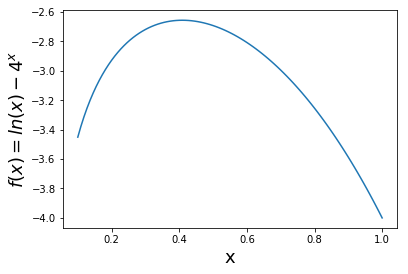

In [5]:
# построим график функции
plt.plot(X,f(X))
plt.xlabel('x',fontsize = 18)
plt.ylabel('$f(x)=ln(x)-4^{x}$',fontsize = 18)
#plt.axvline(x=0.8,ymax = 0.9,linestyle=':', color = 'g')
#plt.axvline(x=1.25,ymax = 0.93,linestyle=':', color = 'g')

Отрезок локализации максимума $[0.3, 0.5]$

Из графика сразу видно, что минимум функции достигается в точке 1

In [6]:
f_min = f(1)
f_min

-4.0

С помощью метода Ньютона найдем максимум

In [7]:
# в функции реализован метод Ньютона
def Newton(x0, eps, f, df):
    xn = x0
    xn_1 = x0
    
    xn = xn - f(xn)/df(xn)
    count = 1
    while abs(xn - xn_1) >= eps:
        xn_1 = xn
        xn = xn - f(xn)/df(xn)
        count+=1
    return xn, count

Введем обозначение $g(x) = f'(x)$

С помощью метода Ньютона решаем уравнение $$g(x) = f'(x) = (\ln(x) - 4^{x})' = {1\over{x}} - 4^{x}\ln{4}= 0$$

Заметим, что
$$g'(x) =  f''(x) = -{1\over{x^{2}}} - 4^{x}\ln^{2}{4}$$

$$g''(x) = f'''(x) = {2\over{x^{3}}} - 4^{x}\ln^{3}{4}$$

In [8]:
def g(x):
    return 1/x - 4**x*np.log(4)
def d_g(x):
    return -1/(x**2) - 4**x*np.log(4)*np.log(4)
def d2_g(x):
    return 2/(x**3) - 4**x*np.log(4)*np.log(4)*np.log(4)

Text(0,0.5,'$g^{(2)}(x)$')

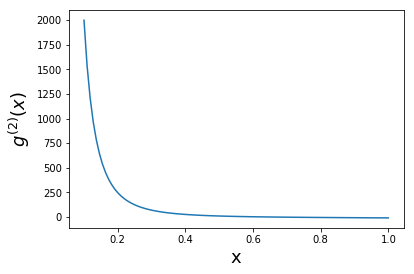

In [9]:
# проверим выполнение условий теоремы 1
# с учетом того, что для максимума
# вторая производная должна быть меньше 0
plt.plot(X, d2_g(X))
plt.xlabel('x',fontsize = 18)
plt.ylabel(r'$g^{(2)}(x)$',fontsize = 18)

In [10]:
# найдем точку максимума с помощью встроенных в питон функций
scipy.optimize.fmin(lambda x: -f(x), 0.2, ftol=10**(-6))

Optimization terminated successfully.
         Current function value: 2.657000
         Iterations: 15
         Function evaluations: 30


array([ 0.40914063])

In [11]:
x_max = 0.4091074

In [12]:
# найдем точку максимума с помощью метода Ньютона
N = Newton(0.2, 10**(-6), g, d_g)
print('Точка максимума = ', N[0], '\nЧисло итераций = ', N[1])

Точка максимума =  0.409107406274 
Число итераций =  5


In [13]:
# Проверим точность вычисления точки максимума
abs(N[0]-x_max)

6.2737992578831836e-09

In [14]:
# Сам максимум
f(N[0])

-2.6570003847399617

Text(0.8,-3.9,'$\\min:[1, -4]$')

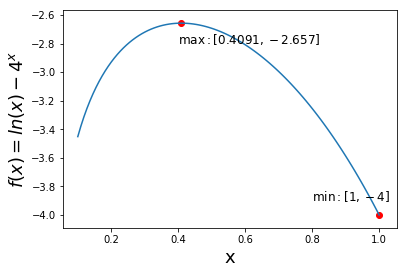

In [15]:
plt.plot(X,f(X))
plt.xlabel('x',fontsize = 18)
plt.ylabel('$f(x)=ln(x)-4^{x}$',fontsize = 18)
plt.scatter([0.4091,1],[-2.657,-4],c = 'r')
plt.annotate('$\max:[0.4091, -2.657]$',(0.4,-2.8),fontsize = 12)
plt.annotate('$\min:[1, -4]$',(0.8,-3.9),fontsize = 12)

### Ответ: 

$$f_{\max} = -2.6570003847399617$$
$$f_{\min} = -4.0 $$

---

###  Задача 9.2
Указанным в индивидуальном варианте методом найти минимумы и максимумы функции $f(x)$  на отрезке $[x_{1},x_{2}]$ с точностью $\varepsilon = 10^{-6}$. Предусмотреть подсчет числа итераций, потребовавшихся для достижения заданной точности.


$$ f(t) = sin{(e^{x})} , \quad x_{1} = 0, x_{2} =1.5, \quad \text{Деление отрезка пополам}$$

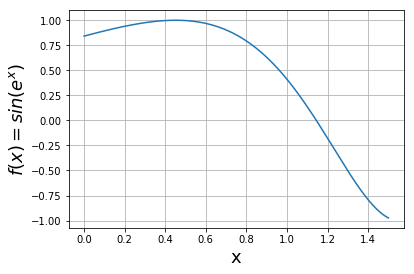

In [16]:
#функция f(x)
def f1(x):
    return np.sin(np.exp(x))
#отрезок [a,b]
a,b=0,1.5
#строим функцию
X = np.arange(a, b, 0.0001)
plt.plot(X, f1(X))
plt.xlabel('x',fontsize = 18)
plt.ylabel('$f(x)=sin(e^{x})$',fontsize = 18)
plt.grid(True)
plt.show()

In [17]:
#метод деления отрезка пополам с заданной точностью для нахождения максимума
def method_share_max(a, b, eps):
    n=0
    
    while (b - a) >= 2*eps:
        n+=1
        x = (a + b) / 2
        delta = 0.25*(b-a)
        if f1(x - delta) < f1(x + delta):
            a, b = x-delta, b
        else:
            a, b = a, x+delta
            
    return (a + b)/2,n

#метод деления отрезка пополам с заданной точностью для нахождения минимума
def method_share_min(a, b, eps):
    n=0
    
    while (b - a) >= eps:
        n+=1
        x = (a + b) / 2
        delta = 0.25*(b-a)
        if f1(x - delta) < f1(x + delta):
            a, b = a, x+delta
        else:
            a, b = x-delta, b
            
    return (a + b) / 2,n

In [18]:
f1_max=method_share_max(a,b,10**(-6))
f1_min=method_share_min(a,b,10**(-6))
print("Максимум функции f(x): ",f1_max[0])
print("Количество итераций для вычисления максимума: ",f1_max[1])
print("Значение максимума функции f(x): ",f1(f1_max[0]))
print("Минимум функции f(x): ",f1_min[0])
print("Количество итераций для вычисления минимума: ",f1_min[1])
print("Значение минимум функции f(x): ",f1(f1_min[0]))

Максимум функции f(x):  0.45158268891276365
Количество итераций для вычисления максимума:  48
Значение максимума функции f(x):  1.0
Минимум функции f(x):  1.4999995752587578
Количество итераций для вычисления минимума:  50
Значение минимум функции f(x):  -0.973506157505


### Ответ: 

$$f_{\max} = 1.0$$
$$f_{\min} = -0.973506157505 $$

$$\text{КОНЕЦ} $$